# Lab 03 : Loss and error rate -- exercise

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS4243_codes/codes/labs_lecture05/lab03_monitoring_loss'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the CIFAR dataset -- check the size carefully!

In [3]:
from utils import check_cifar_dataset_exists
data_path=check_cifar_dataset_exists()

train_data=torch.load(data_path+'cifar/train_data.pt')
train_label=torch.load(data_path+'cifar/train_label.pt')
test_data=torch.load(data_path+'cifar/test_data.pt')

print(train_data.size())

torch.Size([50000, 3, 32, 32])


### Make a ONE layer net class. 

In [4]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        # 一层全连接网络MLP
        self.linear_layer = nn.Linear( input_size, output_size , bias=True)
        
    def forward(self, x):
        
        # 直接输出
        scores = self.linear_layer(x)
        return scores

### Build the net.   

In [5]:
net= one_layer_net(3072,10)

print(net)

one_layer_net(
  (linear_layer): Linear(in_features=3072, out_features=10, bias=True)
)


### Choose the criterion and optimizer. Also choose:

### batchsize = 20

### learning rate = 0.01

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=20

# You only have to complete this cell

### Do 40 passes through the training set (which contains 50,000 images -- not 60,000 like mnist!)

In [7]:
for epoch in range(40):
    
    # 每个Epoch都是重新开始
    running_loss = 0 # COMPLETE HERE
    running_error = 0 # COMPLETE HERE
    num_batches = 0 # COMPLETE HERE
    
    shuffled_indices=torch.randperm(50000)
 
    for count in range(0,50000,bs): # COMPLETE HERE
    
        # Set the gradients to zeros
        optimizer.zero_grad()
        
        # create a minibatch       
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        # reshape the minibatch
        inputs = minibatch_data.view(bs,3072)

        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()

        # forward the minibatch through the net 
        scores=net( inputs ) 

        # Compute the average of the losses of the data points in the minibatch
        loss =  criterion( scores , minibatch_label) 
        
        # backward pass to compute dL/dU, dL/dV and dL/dW   
        loss.backward()

        # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
        optimizer.step()
        
        # START COMPUTING STATS
        
        # add the loss of this batch to the running loss
        # 获得当前的loss
        running_loss += loss.detach().item() # COMPLETE HERE
        
        # compute the error made on this batch and add it to the running error       
        error = utils.get_error(scores.detach() , minibatch_label) # COMPLETE HERE
        running_error += error.item() # COMPLETE HERE
        
        num_batches += 1 # COMPLETE HERE
    
    
    # compute stats for the full training set
    # 总Loss = 每个Batch的Loss累加 / Batch数量累加 = 所有Batch的Loss / Batch数
    # 若Batch Size = 1，则Batch数 = 数据集大小
    # 若Batch Size = 数据集大小，则Batch数 = 1
    total_loss = running_loss/num_batches # COMPLETE HERE
    # 总Error = 每个Batch的Error累加 / Error数量累加 = 所有Batch的Error / Batch数
    # 若Batch Size = ，则Batch数 = 数据集大小
    # 若Batch Size = 数据集大小，则Batch数 = 1
    total_error = running_error/num_batches # COMPLETE HERE
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
    
        
        

epoch= 0 	 loss= 1.9552135838031768 	 error= 69.54399992465973 percent
epoch= 1 	 loss= 1.863914543533325 	 error= 65.18399993419646 percent
epoch= 2 	 loss= 1.83586136469841 	 error= 63.88999994754791 percent
epoch= 3 	 loss= 1.8163539936065674 	 error= 63.30199997186661 percent
epoch= 4 	 loss= 1.807970790529251 	 error= 63.045999991893765 percent
epoch= 5 	 loss= 1.800153231883049 	 error= 62.69799996614456 percent
epoch= 6 	 loss= 1.7910755324602128 	 error= 62.11399992704392 percent
epoch= 7 	 loss= 1.7827829649448395 	 error= 61.59000002861023 percent
epoch= 8 	 loss= 1.778233020234108 	 error= 61.693999960422516 percent
epoch= 9 	 loss= 1.7721039888858796 	 error= 61.33599999904633 percent
epoch= 10 	 loss= 1.7691146693229676 	 error= 61.28799996852875 percent
epoch= 11 	 loss= 1.7643808243751526 	 error= 61.152000043392185 percent
epoch= 12 	 loss= 1.7639909471035005 	 error= 60.904000024795536 percent
epoch= 13 	 loss= 1.7592845445632934 	 error= 60.655999994277956 percent
epo

### Choose image at random from the test set and see how good/bad are the predictions

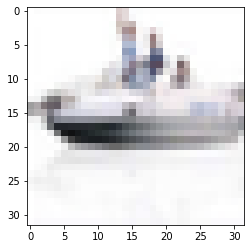

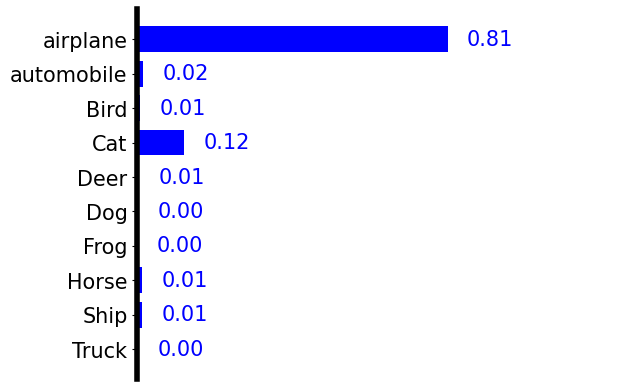

In [8]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,3072)) 
probs= torch.softmax(scores, dim=1)
utils.show_prob_cifar(probs)